# K-Means Clustering Algorithm: Tutorial

In [1]:
# first let's import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## A Standard K-Means Clustering Example
(Inspired by an article originally published on r-posts.com https://r-posts.com/exploring-assumptions-of-k-means-clustering-using-r/)

In [2]:
# read in the data
df = pd.read_csv('data/faithful.csv')
df # visualize the data

,eruption,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
...,...,...
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46


let's visualize the data

(array([16., 28., 26., 24.,  9., 23., 62., 55., 23.,  6.]),
 array([43. , 48.3, 53.6, 58.9, 64.2, 69.5, 74.8, 80.1, 85.4, 90.7, 96. ]),
 <BarContainer object of 10 artists>)

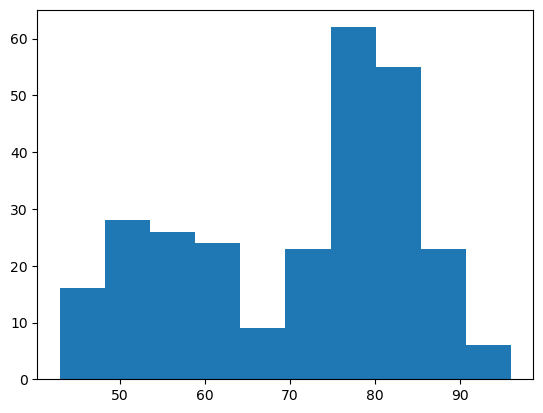

In [8]:
plt.hist(df['waiting'])

(array([45., 36., 13.,  3.,  4., 12., 29., 52., 54., 24.]),
 array([1.6 , 1.95, 2.3 , 2.65, 3.  , 3.35, 3.7 , 4.05, 4.4 , 4.75, 5.1 ]),
 <BarContainer object of 10 artists>)

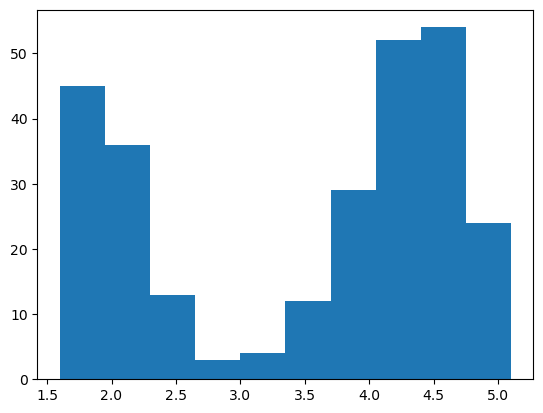

In [ ]:
plt.hist(df['eruption'])

Text(0, 0.5, 'Waiting Time b/w Eruptions (minutes)')

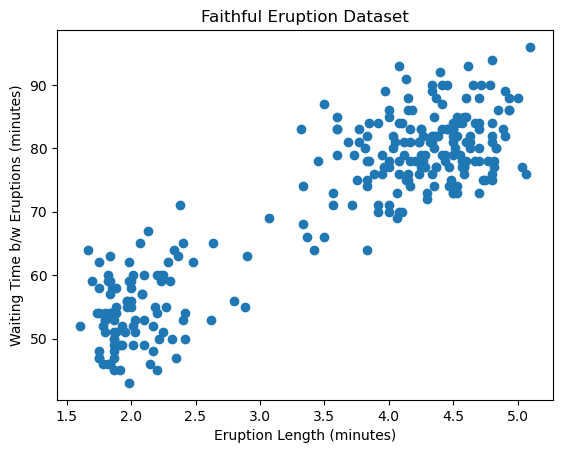

In [6]:
plt.scatter(df['eruption'], df['waiting'])
plt.title('Faithful Eruption Dataset')
plt.xlabel('Eruption Length (minutes)')
plt.ylabel('Waiting Time b/w Eruptions (minutes)')

In [7]:
# format the data to be useful to the KMeans algorithm
X = df.values
X

array([[ 3.6  , 79.   ],
       [ 1.8  , 54.   ],
       [ 3.333, 74.   ],
       [ 2.283, 62.   ],
       [ 4.533, 85.   ],
       [ 2.883, 55.   ],
       [ 4.7  , 88.   ],
       [ 3.6  , 85.   ],
       [ 1.95 , 51.   ],
       [ 4.35 , 85.   ],
       [ 1.833, 54.   ],
       [ 3.917, 84.   ],
       [ 4.2  , 78.   ],
       [ 1.75 , 47.   ],
       [ 4.7  , 83.   ],
       [ 2.167, 52.   ],
       [ 1.75 , 62.   ],
       [ 4.8  , 84.   ],
       [ 1.6  , 52.   ],
       [ 4.25 , 79.   ],
       [ 1.8  , 51.   ],
       [ 1.75 , 47.   ],
       [ 3.45 , 78.   ],
       [ 3.067, 69.   ],
       [ 4.533, 74.   ],
       [ 3.6  , 83.   ],
       [ 1.967, 55.   ],
       [ 4.083, 76.   ],
       [ 3.85 , 78.   ],
       [ 4.433, 79.   ],
       [ 4.3  , 73.   ],
       [ 4.467, 77.   ],
       [ 3.367, 66.   ],
       [ 4.033, 80.   ],
       [ 3.833, 74.   ],
       [ 2.017, 52.   ],
       [ 1.867, 48.   ],
       [ 4.833, 80.   ],
       [ 1.833, 59.   ],
       [ 4.783, 90.   ],


documentation for the KMeans model in sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [10]:
kmeans = KMeans(
    n_clusters=2,
    init='random', # these are called "hyperparameters"
    max_iter=300,
)

kmeans.fit(X) # the fit method will fit the model to the data

/Users/stephencropper/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(init='random', n_clusters=2)

so, what was the result of our fit?

In [12]:
print('Cluster Center 1:', kmeans.cluster_centers_[0])
print('Cluster Center 2:', kmeans.cluster_centers_[1])

Cluster Center 1: [ 2.09433 54.75   ]
Cluster Center 2: [ 4.29793023 80.28488372]


In [14]:
print('SSE:', kmeans.inertia_)

SSE: 8901.76872094721


/Users/stephencropper/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/stephencropper/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/stephencropper/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/stephencropper/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
 

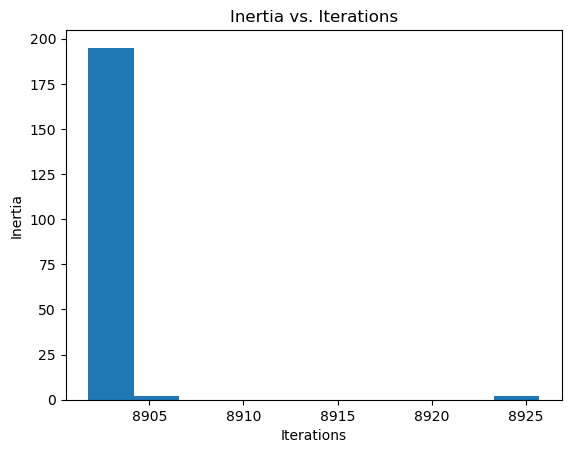

In [17]:
# let's test how initialization impacts the inertia
inertia = []
for i in range(1, 200):
    kmeans = KMeans(
        n_clusters=2,
        init='random',
        max_iter=i,
    )
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
plt.hist(inertia)
plt.title('Inertia vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Inertia')
plt.show()

In [18]:
flags = kmeans.labels_
flags

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0], dtype=int32)

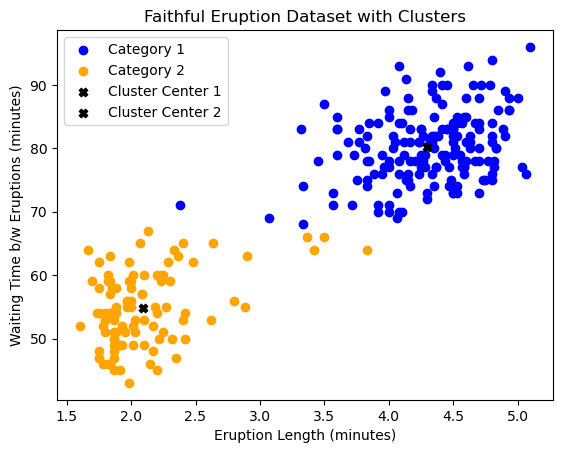

In [23]:
category0 = df[flags == 0]
category1 = df[flags == 1]

plt.scatter(category0['eruption'], category0['waiting'], color='blue', label='Category 1')
plt.scatter(category1['eruption'], category1['waiting'], color='orange', label='Category 2')
plt.scatter(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1], color='black', marker='X', label='Cluster Center 1')
plt.scatter(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1], color='black', marker='X', label='Cluster Center 2')
plt.title('Faithful Eruption Dataset with Clusters')
plt.xlabel('Eruption Length (minutes)')
plt.ylabel('Waiting Time b/w Eruptions (minutes)')
plt.legend()
plt.show()

Now, imagine we see a new eruption! This one lasts for **3 minutes** and came **75.2 minutes** after the previous eruption. What category is it in?

In [24]:
kmeans.predict([[3, 75.2]])

array([0], dtype=int32)

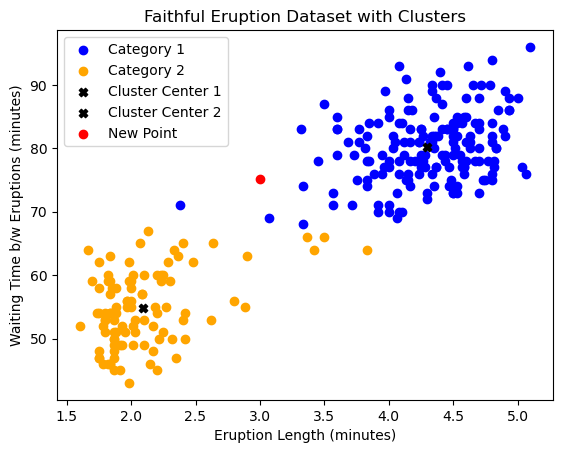

In [25]:
category0 = df[flags == 0]
category1 = df[flags == 1]

plt.scatter(category0['eruption'], category0['waiting'], color='blue', label='Category 1')
plt.scatter(category1['eruption'], category1['waiting'], color='orange', label='Category 2')
plt.scatter(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1], color='black', marker='X', label='Cluster Center 1')
plt.scatter(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1], color='black', marker='X', label='Cluster Center 2')
plt.scatter(3, 75.2, color='red', label='New Point')
plt.title('Faithful Eruption Dataset with Clusters')
plt.xlabel('Eruption Length (minutes)')
plt.ylabel('Waiting Time b/w Eruptions (minutes)')
plt.legend()
plt.show()

## A non-spherical clustering example
Generally speaking, k-means clustering relies on data to be clustered in spherical groups. What happens if we have a non-spherical example?

Let's pretend that this (fake) data, which we will import from 'bulls_eye.csv', is from hits to a bull's eye from your school's archery team practice. Only one problem... *the target is missing!*

that's not what we want! can you think of a way to transform our data to take advantage of the k-means clustering algorithm?

In [27]:
df = pd.read_csv('data/bulls_eye.csv')[['x','y']]
df

,x,y
0,-0.420139,-0.009825
1,-0.056035,0.158766
2,0.694156,-0.563173
3,-0.291152,0.195805
4,0.022523,-0.187408
...,...,...
2995,2.682259,-5.231673
2996,-5.603873,-0.663559
2997,5.224298,-2.026213
2998,-2.991822,5.143475


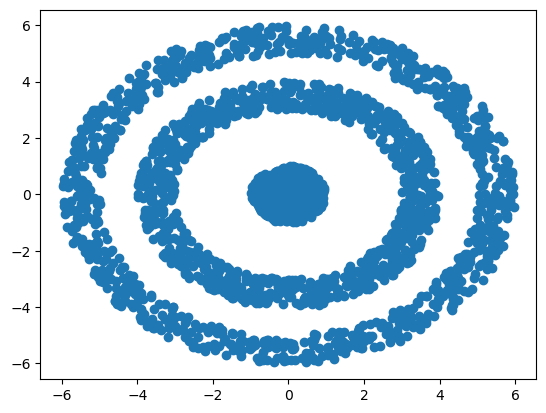

In [32]:
plt.scatter(df['x'], df['y'])

In [39]:
kmeans = KMeans(
    n_clusters=3,
    init='random',
    max_iter=300,
    n_init=10,
)
kmeans.fit(df.values)
flags = kmeans.labels_
flags

array([1, 1, 1, ..., 0, 2, 0], dtype=int32)

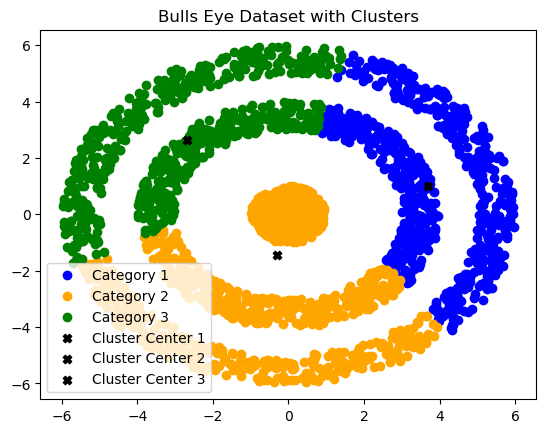

In [40]:
category0 = df[flags == 0]
category1 = df[flags == 1]
category2 = df[flags == 2]
plt.scatter(category0['x'], category0['y'], color='blue', label='Category 1')
plt.scatter(category1['x'], category1['y'], color='orange', label='Category 2')
plt.scatter(category2['x'], category2['y'], color='green', label='Category 3')
plt.scatter(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1], color='black', marker='X', label='Cluster Center 1')
plt.scatter(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1], color='black', marker='X', label='Cluster Center 2')
plt.scatter(kmeans.cluster_centers_[2][0], kmeans.cluster_centers_[2][1], color='black', marker='X', label='Cluster Center 3')
plt.title('Bulls Eye Dataset with Clusters')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

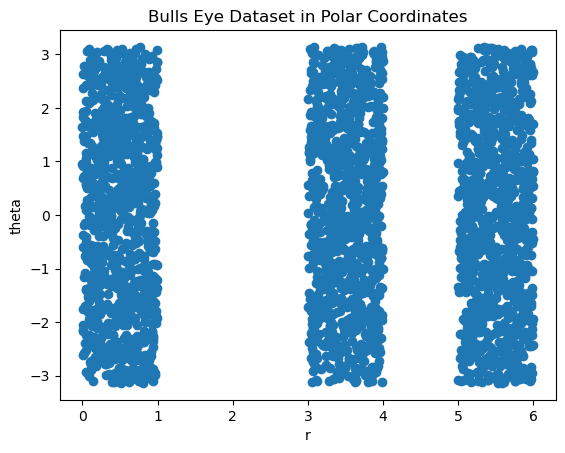

In [42]:
# Polar Coordinates Transformation
df['r'] = np.sqrt(df['x']**2 + df['y']**2)
df['theta'] = np.arctan2(df['y'], df['x'])
plt.title('Bulls Eye Dataset in Polar Coordinates')
plt.xlabel('r')
plt.ylabel('theta')
plt.scatter(df['r'], df['theta'])

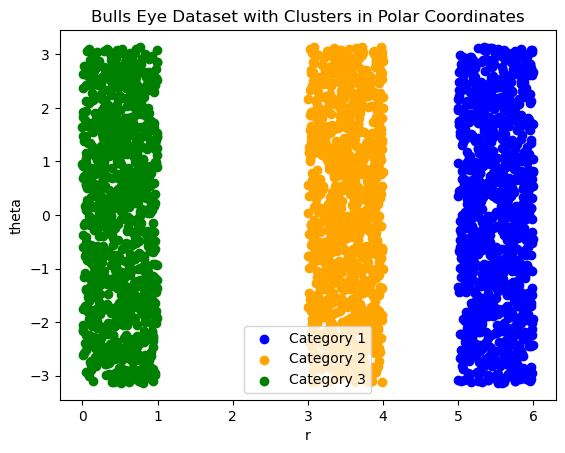

In [48]:
kmeans = KMeans(
    n_clusters=3,
    init='random',
    max_iter=300,
    n_init=10,
)
kmeans.fit(df[['r']].values)
flags = kmeans.labels_
category0 = df[flags == 0]
category1 = df[flags == 1]
category2 = df[flags == 2]
plt.scatter(category0['r'], category0['theta'], color='blue', label='Category 1')
plt.scatter(category1['r'], category1['theta'], color='orange', label='Category 2')
plt.scatter(category2['r'], category2['theta'], color='green', label='Category 3')
plt.title('Bulls Eye Dataset with Clusters in Polar Coordinates')
plt.xlabel('r')
plt.ylabel('theta')
plt.legend()
plt.show()

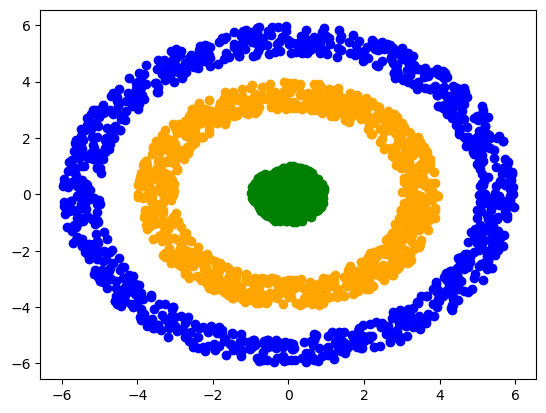

In [50]:
plt.scatter(category0['x'], category0['y'], color='blue')
plt.scatter(category1['x'], category1['y'], color='orange')
plt.scatter(category2['x'], category2['y'], color='green')

Congratulations! Now, you're now officially a k-means clusterer!